# Performance of SPS:
## Using Leap Hybrid Samplers

In [ ]:
import numpy as np
import utility

from solution_partition_solver import SolutionPartitionSolver

In [ ]:
seed = 1543

##Optimal Cost and Optimal Route:
###For number of vehicles variying from 2 to 9 and the number of clients as two times the number of vehicles.

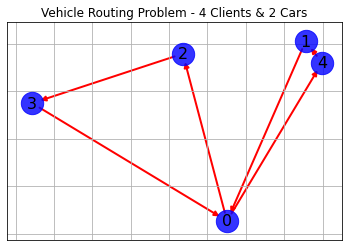

SPS - Optimized Cost: 98.2689659415096




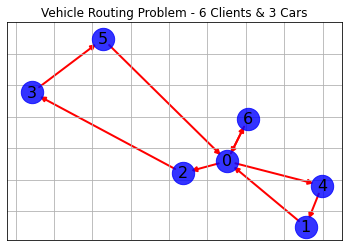

SPS - Optimized Cost: 50.48993730392205




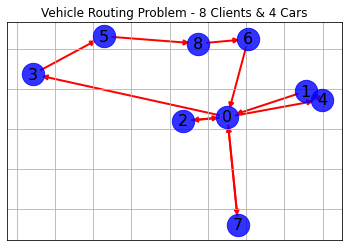

SPS - Optimized Cost: 134.0672821120527




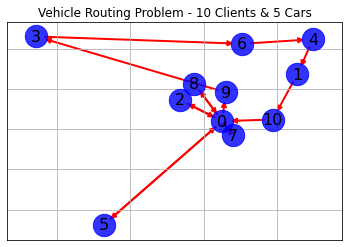

SPS - Optimized Cost: 171.08482564453152




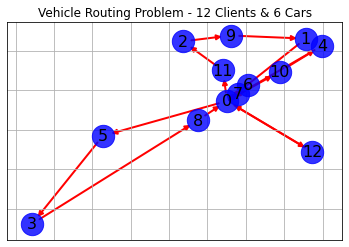

SPS - Optimized Cost: 156.31721792823467




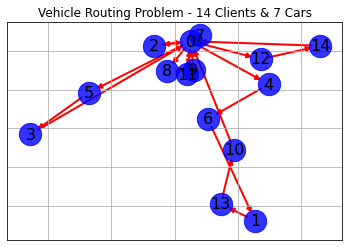

SPS - Optimized Cost: 206.35270056860898




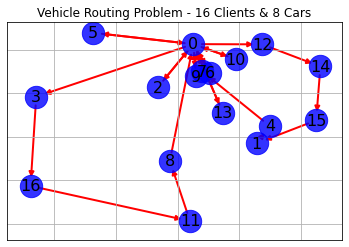

SPS - Optimized Cost: 216.23272051605076




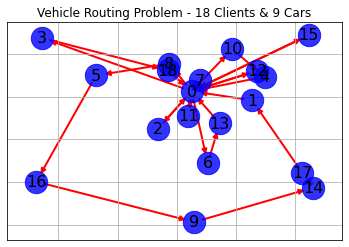

SPS - Optimized Cost: 266.2522904725387




In [ ]:
vrp_list = []
for m in range(2,10,1):
    n = 2*m 
    instance, xc, yc = utility.generate_vrp_instance(n, seed)
    vrp = SolutionPartitionSolver(n, m, instance)
    vrp.solve(solver='leap')
    vrp_list.append(vrp)
    vrp.visualize(xc, yc)
    print(f'SPS - Optimized Cost: {vrp.evaluate_vrp_cost()}')
    print('\n')

##QUBO Build Times:

In [ ]:
for vrp in vrp_list:
    print(vrp.timing['qubo_build_time'])

38830.28030395508
103987.45536804199
260272.97973632812
465566.39671325684
769644.7372436523
1146458.387374878
1760221.4813232422
2537581.9206237793


## D-Wave QPU Access Times:

In [ ]:
for vrp in vrp_list:
    print(vrp.timing['qpu_access_time'])

110836
83105
73267
63805
32880
32896
32898
32918


##Plots for QUBO Build Times:

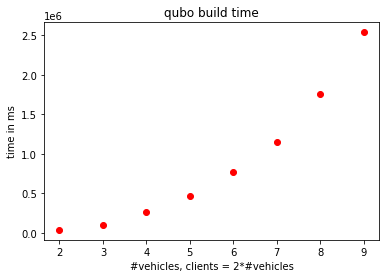

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,10), [y.timing['qubo_build_time'] for y in vrp_list], 'ro')
plt.title('qubo build time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


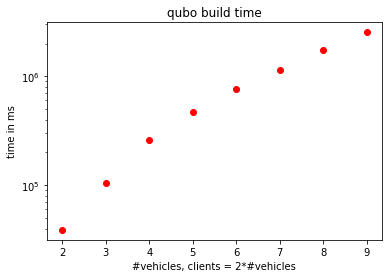

In [ ]:
print('using logarithmic scale')
plt.plot(range(2,10), [y.timing['qubo_build_time'] for y in vrp_list], 'ro')
plt.yscale("log")
plt.title('qubo build time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

##Plots for QPU Access Times:

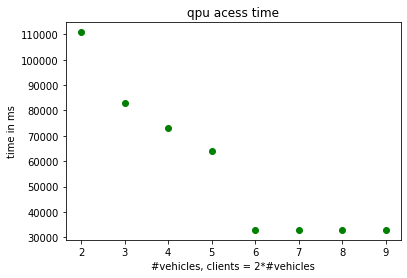

In [ ]:
plt.plot(range(2,10), [y.timing['qpu_access_time'] for y in vrp_list], 'go')
plt.title('qpu acess time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


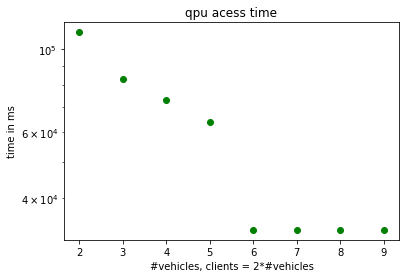

In [ ]:
print('using logarithmic scale')
plt.plot(range(2,10), [y.timing['qpu_access_time'] for y in vrp_list], 'go')
plt.yscale("log")
plt.title('qpu acess time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

##Plots for Total Times:

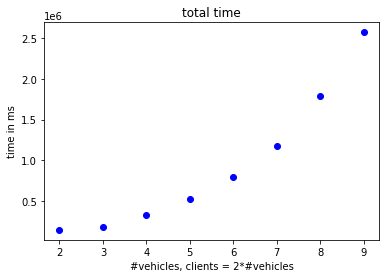

In [ ]:
total_time = []
for y in vrp_list:
    t = (y.timing['qpu_access_time'] + y.timing['qubo_build_time'])
    total_time.append(t)


plt.plot(range(2,10), total_time, 'bo')
plt.title('total time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


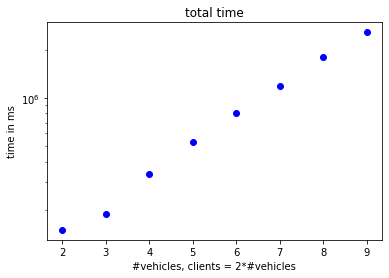

In [ ]:
print('using logarithmic scale')
plt.yscale("log")
plt.plot(range(2,10), total_time, 'bo')
plt.title('total time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()